In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
csv_route= '/content/titanic.csv'
df = pd.read_csv(csv_route)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])  # Cabin tiene demasiados valores nulos
if 'PassengerId' in df.columns:
    df = df.drop(columns=['PassengerId'])
if 'Name' in df.columns and 'Ticket' in df.columns:
    df = df.drop(columns=['Name', 'Ticket'])  # opcional

# 2️⃣ Eliminar filas con datos faltantes en variables importantes
df = df.dropna(subset=['Age', 'Embarked'])

# 3️⃣ (Opcional) Comprobar si quedan NaN
print(df.isnull().sum())

# 4️⃣ Verificar forma final del dataset
print(f"Dataset limpio: {df.shape[0]} filas y {df.shape[1]} columnas")

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Dataset limpio: 712 filas y 8 columnas


In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [ ]:
df['Sex']

,Sex
0,0
1,1
2,1
3,1
4,0
...,...
885,1
886,0
887,1
889,0


In [ ]:
print(df.isnull().sum())


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


##Inicio del k-means

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Seleccionar variables para el clustering
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Escalar los datos (muy importante para K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


##Elegir número de clusters por el método del codo

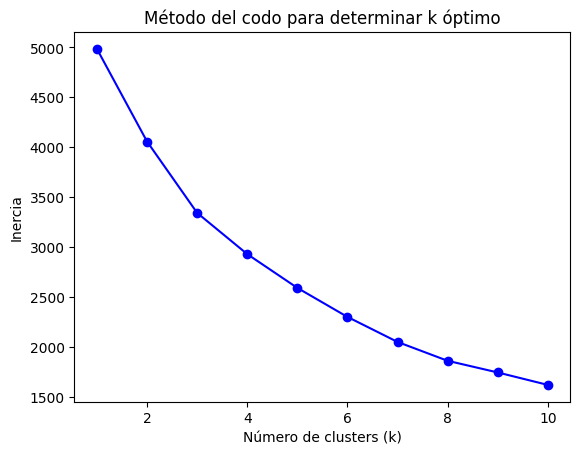

In [ ]:
inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar k óptimo')
plt.show()


Aquí nos podemos percatar que la curva empieza a doblarse desde el número 3

In [ ]:
k = 3

# Crear y entrenar el modelo
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Etiquetas de los clusters asignados a cada pasajero
df['Cluster'] = kmeans.labels_

In [ ]:
print(df['Cluster'].value_counts())


Cluster
2    405
1    186
0    121
Name: count, dtype: int64


In [18]:
from scipy.spatial.distance import cdist
dist_matrix = cdist(kmeans.cluster_centers_, kmeans.cluster_centers_)
print(pd.DataFrame(dist_matrix))


          0         1         2
0  0.000000  3.413808  2.889461
1  3.413808  0.000000  2.569290
2  2.889461  2.569290  0.000000


In [ ]:
cluster_summary = df.groupby('Cluster')[['Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Sex', 'Embarked']].mean()
print(cluster_summary)


           Pclass        Age       Fare     SibSp     Parch       Sex  \
Cluster                                                                 
0        2.528926  15.725207  37.414186  1.677686  1.793388  0.636364   
1        1.064516  39.868280  80.512994  0.419355  0.327957  0.462366   
2        2.693827  29.103506  12.615678  0.209877  0.074074  0.237037   

         Embarked  
Cluster            
0        0.198347  
1        0.451613  
2        0.192593  


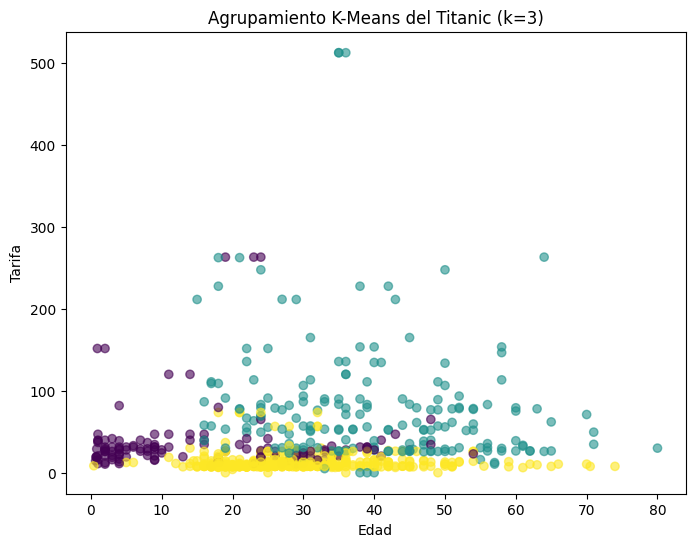

,Pclass,Age,Fare,SibSp,Parch,Sex,Embarked
Cluster,,,,,,,
0,2.53,15.73,37.41,1.68,1.79,0.64,0.20
1,1.06,39.87,80.51,0.42,0.33,0.46,0.45
2,2.69,29.10,12.62,0.21,0.07,0.24,0.19


In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['Fare'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.title('Agrupamiento K-Means del Titanic (k=3)')
plt.show()

df.groupby('Cluster')[['Pclass','Age','Fare','SibSp','Parch','Sex','Embarked']].mean().round(2)


In [ ]:
pd.crosstab(df['Cluster'], df['Survived'], normalize='index') * 100


Survived,0,1
Cluster,,
0,45.454545,54.545455
1,36.021505,63.978495
2,74.567901,25.432099
